phi1         phi2         nstars width
---- -------------------- ------ -----
-6.0  -0.9583333333333334      4   0.2
-5.0 -0.12500000000000022     20   0.2
-4.0  -0.9583333333333334     23   0.2
-3.0  -0.4583333333333335     22   0.2
-2.0  -0.8750000000000001     26   0.2
-1.0 -0.29166666666666674     12   0.2
 0.0  -0.7916666666666667     20   0.2
 1.0 -0.12500000000000022     19   0.2
 2.0  -0.5416666666666667     22   0.2
 3.0  -0.7916666666666667     13   0.2
 4.0  -0.7916666666666667     17   0.2
 5.0  -0.9583333333333334     24   0.2
 6.0  -0.5416666666666667     19   0.2
 7.0  -0.7083333333333334     24   0.2
 8.0  -0.4583333333333335     25   0.2
 9.0  -0.3750000000000002      8   0.2
10.0  -0.8750000000000001     16   0.2
11.0  -0.7916666666666667     13   0.2
12.0 -0.29166666666666674     21   0.2
13.0  -0.6250000000000001     18   0.2
14.0  -0.3750000000000002     20   0.2
15.0 -0.20833333333333348     22   0.2


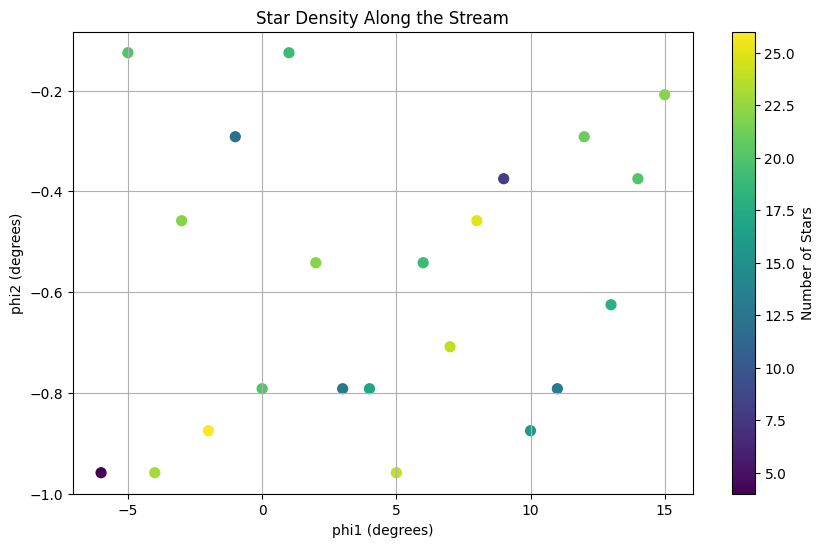

In [11]:
import numpy as np
import astropy.units as u
import astropy.coordinates as coord
from astropy.table import Table
import matplotlib.pyplot as plt

# Simulate more stars (more realistic data)
np.random.seed(42)
phi1_stars = np.random.uniform(-6, 16, 1000)  # 1000 stars in the range [-6, 16]
phi2_stars = np.random.uniform(-2.5, 0, 1000)  # 1000 stars in the range [-2.5, 0]

# Define the stream window (user-defined)
phi1_min, phi1_max = -6, 16  # Phi1 window
phi2_min, phi2_max = -2.5, 0  # Phi2 window

# Define the user-given step size in Phi1 (in degrees)
phi1_step = 1.0  # Example: scan every 1 degree in Phi1

# Step 1: Initialize empty lists for each column in the results table
phi1_vals = []
phi2_vals = []
nstars_vals = []
width_vals = []

# Step 2: Loop through Phi1 window with given step size
for phi1_t in np.arange(phi1_min, phi1_max, phi1_step):
    # Define the window around the current Phi1 point
    # Here we are using a fixed width (for simplicity, can adjust this further)
    width = 0.2  # You can adjust this value or make it dynamic
    mask_phi1 = (np.abs(phi1_stars - phi1_t) < width)

    # Select the stars within the Phi1 window
    selected_phi1 = phi1_stars[mask_phi1]
    selected_phi2 = phi2_stars[mask_phi1]

    # Step 3: Find the Phi2 corresponding to maximum star density
    # We can use histogram to find the mode of Phi2 (max density)
    if len(selected_phi1) > 0:
        hist_phi2, bin_edges = np.histogram(selected_phi2, bins=30, range=(phi2_min, phi2_max))
        max_bin_idx = np.argmax(hist_phi2)  # Index of maximum density
        max_phi2 = (bin_edges[max_bin_idx] + bin_edges[max_bin_idx + 1]) / 2  # The middle of the bin
        
        # Step 4: Count the stars in this region (n_stars)
        n_stars = np.sum(mask_phi1)

        # Append the results for this step to the respective lists
        phi1_vals.append(phi1_t)
        phi2_vals.append(max_phi2)
        nstars_vals.append(n_stars)
        width_vals.append(width)

# Step 3: Create a table to store the results
if phi1_vals:
    density_table = Table([phi1_vals, phi2_vals, nstars_vals, width_vals], 
                          names=('phi1', 'phi2', 'nstars', 'width'))

    # Print the table to verify the results
    print(density_table)

    # Plot the density in the frame (scatter plot of phi1, phi2 values)
    plt.figure(figsize=(10, 6))
    plt.scatter(density_table['phi1'], density_table['phi2'], c=density_table['nstars'], cmap='viridis', s=50)
    plt.colorbar(label='Number of Stars')
    plt.xlabel('phi1 (degrees)')
    plt.ylabel('phi2 (degrees)')
    plt.title('Star Density Along the Stream')
    plt.grid(True)
    plt.show()
else:
    print("No stars were found in the given window.")


In [ ]:
endpoints = coord.SkyCoord(
    ra=[-38.8, 4.7]*u.deg,
    dec=[-45.1, -51.7]*u.deg
)
great_circle_frame = gc.GreatCircleICRSFrame.from_endpoints(endpoints[0], endpoints[1], origin=origin)

In [ ]:
stars = coord.SkyCoord(
    ra=[10.0, 20.0, 30.0]*u.deg,
    dec=[-40.0, -42.0, -38.5]*u.deg,
    frame='icrs'
)

stars_transformed = stars.transform_to(great_circle_frame)